In [1]:
# Import some graphical stuff
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [2]:
# Math and statistics
import numpy as np
from scipy import stats

## Data samples

In [3]:
# Domain for X random variable
x_domain = [-10, 50]

# Distributions of X and Y
x_distribution = stats.uniform(loc=x_domain[0], scale=(x_domain[1] - x_domain[0]))
y_distribution = stats.chi2(df=15)

In [4]:
x_values_1 = x_distribution.rvs(size=150, random_state=42)
y_values_1 = y_distribution.rvs(size=150, random_state=42)
x_values_2 = x_distribution.rvs(size=200, random_state=35)
y_values_2 = y_distribution.rvs(size=200, random_state=35)

# Domain of Y random variable
y_domain = [min(min(y_values_1), min(y_values_2)), max(max(y_values_1), max(y_values_2))]

Distribution of $X\_values$ and $Y\_values$:

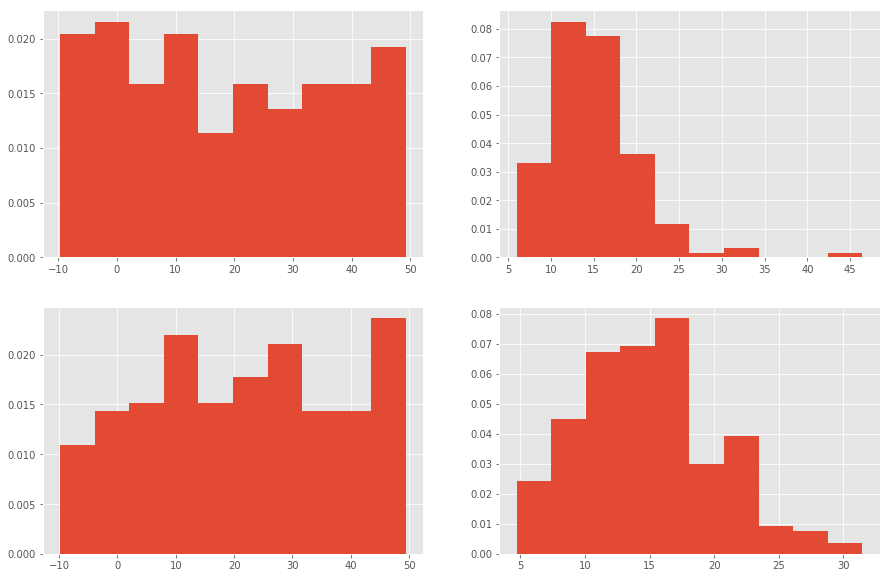

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.hist(x_values_1, density=True)
ax2.hist(y_values_1, density=True)
ax3.hist(x_values_2, density=True)
ax4.hist(y_values_2, density=True)

plt.show()

Z values will depend on X and Y as:
- $Z_1 = 2X + 4Y + \epsilon_1$
- $Z_2 = -6X - Y + \epsilon_2$

where $\epsilon_1 \sim N(0, 15)$, $\epsilon_2 \sim N(0, 20)$

In [6]:
epsilon_distribution_1 = stats.norm(loc=0, scale=15)
epsilon_distribution_2 = stats.norm(loc=0, scale=20)

Z_1 = lambda x, y: 2 * x + 4 * y + epsilon_distribution_1.rvs(size=1, random_state=abs(int(x + y)))[0]
Z_2 = lambda x, y: -6 * x - y + epsilon_distribution_2.rvs(size=1, random_state=abs(int(x + y)))[0]

In [7]:
z_values_1 = list(map(Z_1, x_values_1, y_values_1))
z_values_2 = list(map(Z_2, x_values_2, y_values_2))

### Data visualization

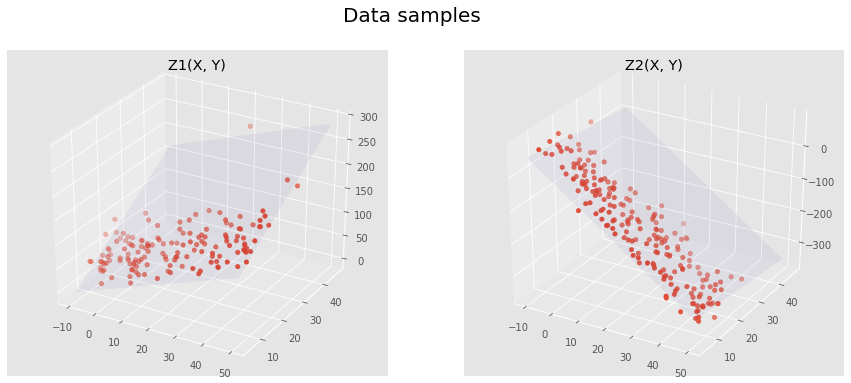

In [8]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

fig.suptitle('Data samples', fontsize=20)
ax1.set_title("Z1(X, Y)")
ax2.set_title("Z2(X, Y)")

X, Y = np.meshgrid(x_domain, y_domain)

ax1.scatter(x_values_1, y_values_1, z_values_1)
ax1.plot_surface(X, Y, np.array([2 * x + 4 * y for x, y in zip(X, Y)]), color='b', alpha=0.05)

ax2.scatter(x_values_2, y_values_2, z_values_2)
ax2.plot_surface(X, Y, np.array([-6 * x - y for x, y in zip(X, Y)]), color='b', alpha=0.05)

plt.show()

## Model testing

In [9]:
from MachineLearning.MultipleLinearRegression import MultipleLinearRegression
from MachineLearning.Preprocessing import make_features_pack, train_test_split

In [10]:
x_pooled_1 = make_features_pack(x_values_1, y_values_1)
x_pooled_2 = make_features_pack(x_values_2, y_values_2)

In [11]:
x_train_1, x_test_1, z_train_1, z_test_1 = train_test_split(x_pooled_1, z_values_1, random_seed=0)
x_train_2, x_test_2, z_train_2, z_test_2 = train_test_split(x_pooled_2, z_values_2, random_seed=0)

In [12]:
model_1 = MultipleLinearRegression()
model_2 = MultipleLinearRegression()

In [13]:
model_1.fit(x_train_1, z_train_1)
model_2.fit(x_train_2, z_train_2)

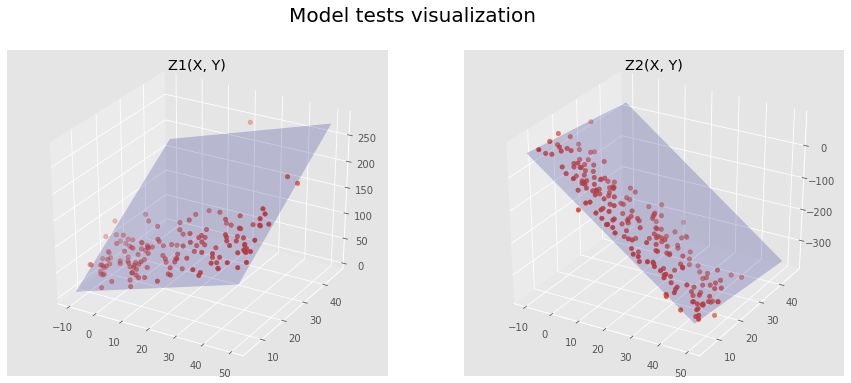

In [14]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

fig.suptitle('Model tests visualization', fontsize=20)
ax1.set_title("Z1(X, Y)")
ax2.set_title("Z2(X, Y)")

X, Y = np.meshgrid(x_domain, y_domain)

ax1.scatter(x_values_1, y_values_1, z_values_1)
ax1.plot_surface(X, Y, np.array([model_1.predict([x, y]) for x, y in zip(X, Y)]), color='b', alpha=0.2)

ax2.scatter(x_values_2, y_values_2, z_values_2)
ax2.plot_surface(X, Y, np.array([model_2.predict([x, y]) for x, y in zip(X, Y)]), color='b', alpha=0.2)

plt.show()

## Quality assessment

Now we should make some assessment of model accuracy. For instance using MSE, RMSE and MAE metrics:
$$MSE = \frac{1}{n}\sum^n_{i=1} (Y_i - \hat Y_i)^2$$ $$RMSE = \sqrt{\frac{1}{n}\sum^n_{i=1} (Y_i - \hat Y_i)^2} = \sqrt{MSE}$$ $$MAE = \frac{1}{n}\sum^n_{i=1} |Y_i - \hat Y_i|$$

In [15]:
import pandas as pd

In [16]:
from MachineLearning.Metrics import (mean_squared_error,
                                     root_mean_squared_error,
                                     mean_absolute_error)

In [17]:
z_pred_1 = model_1.predict(x_test_1)
z_pred_2 = model_2.predict(x_test_2)

In [18]:
columns = ["Model", "MSE", "RMSE", "MAE"]

quality_1 = pd.Series(
    [
        "1",
        mean_squared_error(z_pred_1, z_test_1), 
        root_mean_squared_error(z_pred_1, z_test_1), 
        mean_absolute_error(z_pred_1, z_test_1)
    ], index=columns
)

quality_2 = pd.Series(
    [
        "2",
        mean_squared_error(z_pred_2, z_test_2), 
        root_mean_squared_error(z_pred_2, z_test_2), 
        mean_absolute_error(z_pred_2, z_test_2)
    ], index=columns
)

table = pd.DataFrame(
    [quality_1, quality_2], columns=columns
).set_index("Model")

In [19]:
display(table)

,MSE,RMSE,MAE
Model,,,
1,231.230281,15.206258,12.414398
2,255.995886,15.999871,13.475824


In [20]:
model_1.parameters.coefficients

(6.314295404809162, 1.6472120096196523, 4.014891888558277)

In [21]:
model_2.parameters.coefficients

(7.686185314146034, -6.4707147285993285, -0.9578420367166431)